<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision

import matplotlib.pyplot as plt

In [5]:
torch.backends.cudnn.enabled = False
torch.manual_seed(123)

mnist_transform = torchvision.transforms.Compose([
  torchvision.transforms.ToTensor(),
  torchvision.transforms.Normalize((0.1307,), (0.3081,))
  ])

train_data = torchvision.datasets.MNIST(
  './data/', 
  train=True, 
  download=True,
  transform=mnist_transform
  )

test_data = torchvision.datasets.MNIST(
  './data/', 
  train=False, 
  download=True,
  transform=mnist_transform
  )

train_loader = torch.utils.data.DataLoader(
  train_data,
  batch_size=4, 
  shuffle=True
  )

test_loader = torch.utils.data.DataLoader(
  test_data,
  batch_size=2, 
  shuffle=False
)

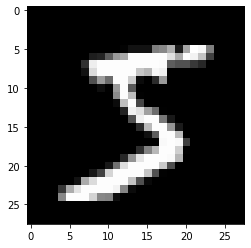

In [6]:
images, labels = train_data[0]
plt.imshow(images.reshape(28, 28), cmap='gray')


In [7]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [9]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)
    return F.log_softmax(x, dim=1)

model = ConvNet()
model.train()

opt = torch.optim.Adam(model.parameters(), lr=0.01)
for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
        opt.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        opt.step()

        if batch_idx % 1000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))

    for batch_idx, (data, target) in enumerate(test_loader):
        output = model(data)
        pred = output.data.max(1, keepdim=True)[1]
        correct = pred.eq(target.data.view_as(pred)).sum()
        print('Test Epoch: {} [{}/{} ({:.0f}%)]\tAccuracy: {:.6f}'.format(
            epoch, batch_idx * len(data), len(test_loader.dataset),
            100. * batch_idx / len(test_loader), correct.item() / len(data)))

        

In [11]:
from torchvision import transforms

In [12]:
import random
from timm.data.auto_augment import rand_augment_transform
tfm = rand_augment_transform(
    config_str='rand-m9-mstd0.5',
    hparams={'img_mean': (124, 116, 104)}
)

class Augmenter:
    def __init__(self, transform_list):
        self.seed = 123
        random.seed(self.seed)
        self.transform_list = transform_list
    
    def __call__(self, x):
    
        x = random.choice(self.transform_list)(x)
        return x

In [44]:
tfm

RandAugment(n=2, ops=
	AugmentOp(name=AutoContrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Equalize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Invert, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Rotate, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Posterize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Solarize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=SolarizeAdd, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Color, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Contrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Brightness, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Sharpness, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearX, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearY, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateXRel, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateYRel, p=0.5, m=9, mstd=0.5))

ToPILImage(mode=tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.2842,
           0.7468,  1.7778,  1.7650, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4

In [57]:
t = transforms.ToPILImage()
t(example_data[0,:]).show()


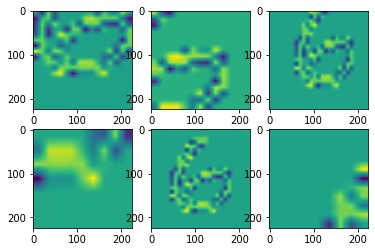

In [61]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(tfm(t(example_data[0,:])))

In [58]:


from timm.data.transforms import RandomResizedCropAndInterpolation
from PIL import Image
from matplotlib import pyplot as plt

tfm = RandomResizedCropAndInterpolation(size=224)




In [37]:
resnet.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [39]:
# timm ResNet50


import timm

resnet = timm.create_model('resnet50', pretrained=True)

class Encoder(nn.Module):
    def __init__(self, model, embedding_dim=2048):
        super().__init__()
        self.model = model
        self.model.fc = nn.Linear(2048, embedding_dim)
    def forward(self, x):
        x = self.model(x)
        return x
    
class Projector(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(in_features, out_features),
            nn.BatchNorm1d(out_features),
            nn.ReLU(),
            nn.Linear(out_features, out_features),
            nn.BatchNorm1d(out_features),
            nn.ReLU(),
            nn.Linear(out_features, out_features)
        )
    
    def forward(self, x):
        return self.fc(x)

In [23]:
conv = nn.Conv2d(1, 3, 1)

In [18]:
conv(example_data).shape

torch.Size([4, 3, 28, 28])

In [59]:
example_data[:, None, :].shape

torch.Size([4, 1, 1, 28, 28])

In [25]:
encoder = Encoder(resnet)

In [28]:
encoded = encoder(conv(example_data))

In [29]:
encoded.shape

torch.Size([4, 2048])

In [40]:
proj = Projector(2048, 8192)

In [43]:
embedding = proj(encoded)

In [ ]:
x = example_data
y_a, y_b = augment(x)

In [ ]:
# for x in loader:

y_a, y_b = augment(x)

z_a = (y_a)
z_b = f(y_b)

z_a_norm = (z_a - z_a.mean(0)) / z_a.std(0)
z_b_norm = (z_b - z_b.mean(0)) / z_b.std(0)

c = torch.mul(z_a_norm.T, z_b_norm)

c_diff = (c - torch.eye(D)).pow(2)

off_diagonal(c_diff).mul_(lambda_)
loss = c_diff.sum()

loss.backward()
opt.step()
